# Introduction: Text Classification with Naive Bayes

Welcome to this Jupyter Notebook, where we'll explore the fascinating world of text classification using the renowned **20 Newsgroups Dataset**. This collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups, provides a rich playground for us to apply and evaluate the performance of the Multinomial Naive Bayes classifier.

### Objective:
Our quest is to navigate through the intricacies of natural language data and to harness the power of the Naive Bayes algorithm to accurately classify documents into their respective newsgroups. We aim to dissect and understand the underlying patterns within the textual data that can guide our model to make precise predictions.

$$\Large \displaystyle P(C_k | x) = \frac{P(x | C_k) P(C_k)}{P(x)}$$

- \$ P(C_k | x) \$ is the posterior probability of class \$ C_k \$ given predictor \$ x \$.
- \$ P(x | C_k) \$ is the likelihood which is the probability of predictor \$ x \$ given class \$ C_k \$.
- \$ P(C_k) \$ is the prior probability of class \$ C_k \$.
- \$ P(x) \$ is the prior probability of predictor \$ x \$.

### Dataset Overview:
The 20 Newsgroups dataset is a benchmark dataset for document classification and text analysis. Each document is a newsgroup post that falls into one of 20 categories, which range from sports and religion to science and technology. The dataset's diversity in topics and natural language complexity makes it an excellent candidate for text classification tasks.

### Structure of this Notebook:
1. [Installing and Importing Necessary Libraries](#ch1)
2. [Loading the 20 Newsgroups Dataset](#ch2)
3. [Text Preprocessing and Normalization](#ch3)
4. [Feature Extraction with TF-IDF Vectorization](#ch4)
5. [Splitting the Data](#ch5)
6. [Training the Multinomial Naive Bayes Model](#ch6)
7. [Evaluation of Naive Bayes Model](#ch7)
8. [Confusion Matrix](#ch8)
9. [Classification Report](#ch9)
10. [Conclusion](#ch10)

Embark with us on this analytical expedition to uncover the predictive power of the Naive Bayes classifier on the 20 Newsgroups dataset!

## 1. Installing and Importing Necessary Libraries <a id='ch1'></a>

Before diving into the text classification task, it's crucial to set up our environment with the necessary Python libraries that will empower our analysis:

- **`numpy`** and **`pandas`**: These are the cornerstones for data manipulation and numerical computations in Python. They provide sophisticated data structures and functions that are indispensable for handling and analyzing complex datasets.

- **`matplotlib.pyplot`** and **`seaborn`**: Our go-to libraries for visualizing data, they offer a rich set of plotting functions that enable us to create insightful and attractive visual representations of our data.

- **`re`**: The library for regular expression operations, which is particularly useful for text processing tasks such as pattern searching, substitutions, and splits.

- **`sklearn.feature_extraction.text`**: Part of the scikit-learn library, this module includes text processing tools like `TfidfVectorizer`, which we will use to convert text data into a format that can be used by our machine learning model.

- **`sklearn.datasets`**: This module provides easy access to datasets, including the 20 newsgroups dataset, which is a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups.

- **`sklearn.model_selection`**: Contains model selection utilities like `train_test_split`, which we'll use to divide our dataset into training and testing sets to evaluate the performance of our model.

- **`sklearn.naive_bayes`**: Houses the Naive Bayes classifier, `MultinomialNB`, which is a probabilistic learning method widely used for text classification.

- **`sklearn.metrics`**: Offers a suite of functions to evaluate the performance of our model, including `classification_report` for a comprehensive summary of precision, recall, and F1 scores, `accuracy_score` for the overall accuracy, and `confusion_matrix` for a detailed breakdown of correct and incorrect classifications.

- **`nltk`**: The Natural Language Toolkit is a powerful library for working with human language data in Python. It includes functions for text processing and natural language understanding, such as tokenization and stemming.

- **`IPython.display`**: Provides utilities for rich content integration in Jupyter notebooks, allowing us to display markdown, HTML, images, and other rich media in an interactive format.

With these libraries at our disposal, we are well-equipped to proceed with our text classification project, ensuring a streamlined and efficient workflow from data preprocessing to model evaluation.

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# NLP libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Dataset
from sklearn.datasets import fetch_20newsgroups

# Data preprocessing and utilities
from sklearn.model_selection import train_test_split

# Machine Learning Model
from sklearn.naive_bayes import MultinomialNB

# Metrics and evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Text preprocessing and natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('wordnet')

# To display markdown text
from IPython.display import display, Markdown, HTML

## 2. Loading the 20 Newsgroups Dataset <a id='ch2'></a>

The **20 Newsgroups Dataset** is a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. This dataset is a popular resource for experiments in text applications of machine learning techniques, such as text classification and text clustering.

The dataset comprises newsgroup documents from a wide range of topics, including:

- Science (e.g., `sci.space`, `sci.med`)
- Technology (e.g., `comp.graphics`, `comp.os.ms-windows.misc`)
- Religion (e.g., `alt.atheism`, `soc.religion.christian`)
- Politics (e.g., `talk.politics.mideast`, `talk.politics.guns`)
- Recreation (e.g., `rec.autos`, `rec.sport.baseball`)
- and many more.

Each document in the dataset is a discussion that might include topics of interest, questions, or opinions from one of the twenty newsgroups. Here's a glimpse into the dataset structure and a sample document:

- `keys()`: Returns the keys of the dataset dictionary.
- `target_names`: Provides the names of the 20 different newsgroups.
- `data`: Contains the actual text documents from the newsgroups.

By fetching the dataset with `subset='all'`, we retrieve both the training and testing subsets, giving us the full range of documents to work with for our analysis.

Here is a sample text from the dataset, providing a real-world example of the type of text data we will be working with:

In [2]:
# Fetch the 20 newsgroups dataset, including all subsets (train and test)
newsgroups_data = fetch_20newsgroups(subset='all')

# Explore the data structure
print(newsgroups_data.keys())
print(newsgroups_data.target_names)
print("\nSample text:\n", newsgroups_data.data[0])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Sample text:
 From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse th

## 3. Text Preprocessing and Normalization <a id='ch3'></a>

Before we can feed the textual data into a machine learning model, it's crucial to preprocess and normalize the text. This process involves several steps that convert the raw text into a more analyzable and uniform format, which is essential for effective feature extraction and model training.

Here are the key preprocessing steps we've implemented:

1. <span style="color:red">**Lowercasing**</span>: Convert all characters in the text to lowercase to ensure uniformity and to avoid distinguishing between words based on case.

2. <span style="color:red">**Punctuation and Number Removal**</span>: Strip away all non-alphabetic characters, such as punctuation and numbers, to focus solely on the textual content.

3. <span style="color:red">**Tokenization**</span>: Split the text into individual words or tokens. This step is fundamental in natural language processing and helps in the subsequent steps of analysis and feature extraction.

4. <span style="color:red">**Stopword Removal**</span>: Eliminate common words that carry minimal useful information, such as "the", "is", and "in". These words are known as stopwords and can be distracting to the algorithms.

5. <span style="color:red">**Lemmatization**</span>: Reduce words to their base or root form. For instance, "running" and "runs" are lemmatized to "run". This helps in consolidating the different forms of a word into a single representation.

The following code snippet demonstrates the implementation of these preprocessing steps:

In [3]:
# Initialize the WordNetLemmatizer to reduce words to their base or root form
lemmatizer = WordNetLemmatizer()

# Create a set of English stopwords for removal during preprocessing
stop_words = set(stopwords.words('english'))

# Define a function to preprocess text data
def preprocess_text(text):
    # Convert the entire text to lowercase to maintain consistency
    text = text.lower()
    
    # Use regular expressions to remove punctuation and numbers, keeping only alphabets and spaces
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Split the text into individual words (tokenization)
    words = text.split()
    
    # Remove stopwords and lemmatize each word to its base form
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join the processed words back into a single string
    return ' '.join(words)

# Apply the preprocessing function to each document in the dataset
newsgroups_data.data = [preprocess_text(text) for text in newsgroups_data.data]

## 4. Feature Extraction with TF-IDF Vectorization <a id='ch4'></a>

### Feature Extraction with TF-IDF Vectorization

After preprocessing the text data, the next step is to convert the textual information into numerical data that machine learning models can understand and process. This is where feature extraction comes into play. We use the Term Frequency-Inverse Document Frequency (TF-IDF) vectorization technique to transform the text into a meaningful representation of numbers.

The `TfidfVectorizer` accomplishes two main tasks:

1. <span style="color:red">**Term Frequency (TF)**</span>: It counts the number of times a word appears in a document (the term frequency), normalizing this count by the length of the document to account for different document lengths.

2. <span style="color:red">**Inverse Document Frequency (IDF)**</span>: It measures how important a word is within the entire collection of documents (the corpus). Words that appear frequently in a single document but less often in the corpus receive a higher score, highlighting their significance in the context of the document.

The following code snippet demonstrates the use of `TfidfVectorizer`:

In [4]:
# Initialize TF-IDF Vectorizer with a maximum of 5000 terms
vectorizer = TfidfVectorizer(max_features=5000)

# Create TF-IDF features from the preprocessed text data
X = vectorizer.fit_transform(newsgroups_data.data)

# Set the target categories for the documents
y = newsgroups_data.target

By setting `max_features=5000`, we limit the number of features to the top 5000 terms in the corpus, which helps to focus on the most relevant terms and reduces the computational complexity.

The output `X` is a sparse matrix representing the TF-IDF scores of words in the documents, and `y` contains the target labels corresponding to the categories of the 20 newsgroups dataset. This transformation is critical for preparing our dataset for the machine learning models that will follow.

## 5. Splitting the Data <a id='ch5'></a>

Before we proceed to model training, it is essential to divide our dataset into training and testing sets. This practice is a cornerstone of machine learning, ensuring that we have a separate dataset to evaluate our model's performance objectively.

We use the `train_test_split` function from scikit-learn to partition the dataset:

- `X_train` and `y_train` are the subsets of features and labels used for training the model. They contain 80% of the data, providing a rich set for the model to learn from.
- `X_test` and `y_test` are the subsets reserved for testing the model. They comprise 20% of the data, which we will use to assess how well the model generalizes to new, unseen data.

The `test_size` parameter is set to 0.2, indicating that 20% of the data should be allocated for the test set. The `random_state` is fixed at 1337, a commonly used "seed" in random number generation, to ensure that our train-test split is reproducible across different runs.

Here's the updated code snippet with the print statements to display the number of samples in each set:

In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

# Display the size of the training and testing sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 15076 samples
Testing set size: 3770 samples


## 6. Training the Multinomial Naive Bayes Model <a id='ch6'></a>

With our data neatly split into training and testing sets, we proceed to the training phase. We've chosen the Multinomial Naive Bayes (MNB) algorithm for our initial model due to its simplicity and effectiveness in text classification tasks, especially when dealing with term frequency data.

The MNB model is particularly well-suited for classification with discrete features (e.g., word counts for text classification). It calculates the probability of each class and the conditional probability of each class given each input value. These probabilities are then used to make predictions for new data.

Here's how we train our MNB model:

In [6]:
# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model with the training data
model.fit(X_train, y_train)

MultinomialNB()

## 7. Evaluation of Naive Bayes Model <a id='ch7'></a>

After making predictions with our trained model, it's crucial to evaluate its performance. For classification tasks, one of the primary metrics used is accuracy, which is defined as:

<span style="color:red">**Accuracy**</span>: This metric represents the proportion of true results (both true positives and true negatives) among the total number of cases examined. To put it simply, it measures how many predictions made by the model are correct. The formula for accuracy is given by:

$$\Large \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions made}}$$

- The **Number of correct predictions** is the count of instances where the predicted label $\hat{y}_i$exactly matches the true label $y_i$
- The **Total number of predictions made** is the count of all predictions made by the model.

In practical terms, we calculate the accuracy to get a quantitative measure of how well our model predicts the correct labels. We use scikit-learn's `accuracy_score` function to compute the accuracy of our model on the test set, which can be interpreted as follows:

- An **accuracy of 1.0** means the model is perfect at prediction.
- An **accuracy of 0.5** suggests the model is no better than random guessing.
- An **accuracy of 0.0** indicates the model is always wrong in its predictions.

This metric is particularly useful when the number of observations in each class is similar. However, it might be misleading when there is a severe class imbalance.

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 84.64%


## 8. Confusion Matrix <a id='ch8'></a>

A **Confusion Matrix** is a powerful tool to understand the performance of a classification model. It provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions for each class. This granularity allows us to pinpoint specific areas where the model might be struggling.

In the matrix:
- Rows represent the **actual classes**.
- Columns represent the **predicted classes**.

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

In this section, we'll:
1. <span style="color:red">**Calculate the Confusion Matrix**</span>: Using scikit-learn's `confusion_matrix` function, we'll compute the matrix for our test data predictions.
  
2. <span style="color:red">**Visualize the Matrix**</span>: We'll use Seaborn's heatmap function to visualize the confusion matrix. This visualization will help us quickly identify which classes are being confused with others.

Let's take a look at the confusion matrix for our model:

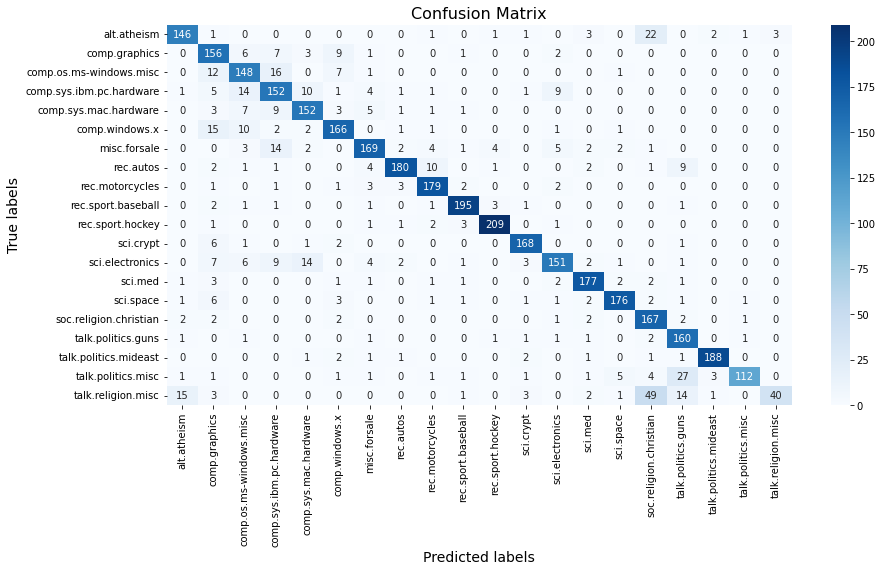

In [8]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=newsgroups_data.target_names, yticklabels=newsgroups_data.target_names)
plt.xlabel('PREDICTED', fontsize=14)
plt.ylabel('ACTUAL', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## 9. Classification Report <a id='ch9'></a>

After obtaining the overall accuracy of our model, it's important to delve deeper and understand its performance across the different classes present in our dataset. The classification report is a valuable tool that provides key metrics for each class, which include precision, recall, and the F1-score.

- **Precision**: Indicates the proportion of positive identifications that were actually correct. A high precision relates to a low false positive rate.
- **Recall**: Reflects the proportion of actual positives that were identified correctly. A high recall indicates that the model is good at capturing the positive cases.
- **F1-Score**: A weighted harmonic mean of precision and recall. It conveys the balance between the precision and the recall.
- **Support**: The number of actual occurrences of the class in the specified dataset.

These metrics provide a more granular understanding of where the model excels and where it might be lacking. For instance, a high precision indicates that false positives are low, while a high recall indicates that false negatives are low.

In this section, we'll:
1. <span style="color:red">**Generate the Classification Report**</span>: Using scikit-learn's `classification_report` function, we'll compute these metrics for our test data predictions.
  
2. <span style="color:red">**Visualize the Report**</span>: To make the report more readable, we'll convert it into a pandas DataFrame and display it with enhanced formatting.

Let's take a detailed look at the classification report for our model:

In [9]:
# Set the display option for floating point numbers
pd.options.display.float_format = "{:,.2f}".format

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=newsgroups_data.target_names, output_dict=True)

# Convert the report dictionary to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Create a custom CSS style for larger font sizes
style = """
<style>
    table {
        font-size: 24px;  
    }
    th {
        font-size: 18px; 
    }
</style>
"""

# Display the custom style
display(HTML(style))

# Display the report using Markdown
display(Markdown("### Classification Report"))
display(report_df)

### Classification Report

,precision,recall,f1-score,support
alt.atheism,0.87,0.81,0.84,181.00
comp.graphics,0.69,0.84,0.76,185.00
comp.os.ms-windows.misc,0.75,0.80,0.77,185.00
comp.sys.ibm.pc.hardware,0.72,0.76,0.74,199.00
comp.sys.mac.hardware,0.82,0.84,0.83,182.00
comp.windows.x,0.84,0.83,0.84,199.00
misc.forsale,0.86,0.81,0.83,209.00
rec.autos,0.94,0.85,0.89,211.00
rec.motorcycles,0.88,0.93,0.91,192.00
rec.sport.baseball,0.94,0.95,0.94,206.00


## 10. Conclusion <a id='ch10'></a>

In this analysis, we applied the Multinomial Naive Bayes algorithm to classify texts from the 20 Newsgroups dataset. Our model achieved an overall accuracy of 85%, which is a strong baseline for such a diverse and unstructured dataset.

### Key Takeaways from the Classification Report:

- **High Precision in Specific Categories**: The model showed high precision in categories such as `talk.politics.mideast` and `talk.politics.misc`, indicating a strong ability to correctly identify relevant messages without many false positives.

- **Recall Variances**: Recall varied across categories, with high recall in `soc.religion.christian` and `talk.politics.guns`, suggesting the model is adept at identifying most relevant messages in these categories. However, categories like `talk.religion.misc` had a notably lower recall, indicating room for improvement in capturing all relevant messages.

- **F1-Score Insights**: The F1-score, which balances precision and recall, was particularly high in `rec.sport.hockey` and `sci.crypt`, showing that the model's predictions are reliable in these areas. Conversely, the `talk.religion.misc` category had a low F1-score, highlighting a challenge for the model in this domain.

- **Support**: The support value, indicating the number of true instances for each label, shows that the dataset is fairly balanced, which helps in evaluating the model's performance across different categories.

### Overall Model Performance:

The Multinomial Naive Bayes classifier performed well across most categories, with some exceptions where either precision or recall could be improved. The high accuracy and F1-scores in several categories demonstrate the model's effectiveness for text classification tasks. However, the lower performance in certain categories suggests that additional feature engineering, model tuning, or even ensemble methods could be explored to enhance the model's ability to generalize across all topics.

In conclusion, the Multinomial Naive Bayes model serves as a solid benchmark for text classification on the 20 Newsgroups dataset. Future work could involve experimenting with different preprocessing techniques, utilizing more complex models, or incorporating additional data to further improve classification performance.
